# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [36]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
doors = [1, 2, 3]
car = np.random.randint(1, 4)
player_selection = np.random.randint(1, 4)
print(car, player_selection)

3 1


In [38]:
remaining_goats = [door for door in doors if door != car and door != player_selection] # goats not chosen (all doors less car and chosen door)
door_revealed = np.random.choice(remaining_goats) #door that is revealed to have a goat
switched = [door for door in doors if door != player_selection and door != door_revealed][0] #switch to win

print(f'Player selection: {player_selection}')
print(f'Car door: {car}')
print(f'Goats Remaining: {remaining_goats}')
print(f'Door Revealed: {door_revealed}')
print(switched)

Player selection: 1
Car door: 3
Goats Remaining: [2]
Door Revealed: 2
3


Simulated Probability of Winning
Stay: 0.338
Switch: 0.662


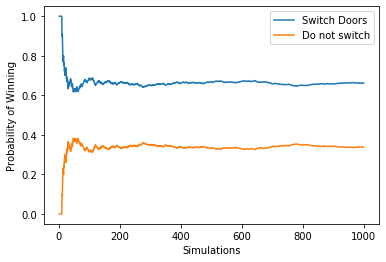

In [52]:
np.random.seed(1)

switch = []
stay = []
for i in range(1, 1001):
    car = np.random.randint(1, 4)
    player_selection = np.random.randint(1, 4)
    remaining_goats = [door for door in doors if door != car and door != player_selection]
    door_revealed = np.random.choice(remaining_goats)
    switched_door = [door for door in doors if door != player_selection and door != door_revealed][0]
    
    # check if the switched door is the car door
    if switched_door == car:
        switch.append(1)
    else:
        switch.append(0)
        
    if player_selection == car:
        stay.append(1)
    else:
        stay.append(0)
    
    switch_prob = len(switch) / i
    stay_prob = len(stay) / i
    
plt.plot(np.arange(1, 1001), [np.mean(switch[:i]) for i in range(1, 1001)], label="Switch Doors")
plt.plot(np.arange(1, 1001), [np.mean(stay[:i]) for i in range(1, 1001)], label="Do not switch")
plt.legend()
plt.xlabel('Simulations')
plt.ylabel('Probability of Winning')
print('Simulated Probability of Winning')
print(f'Stay: {np.mean(stay)}')
print(f'Switch: {np.mean(switch)}')

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 